In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
data = pd.read_csv('./data_plug_power_PLUG.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [3]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2011-01-04,12,0.046417,0.349500,0.445792,0.4584
2011-01-05,1,0.000000,0.000000,0.000000,0.4550
2011-01-10,3,0.000000,0.065000,0.175567,0.4610
2011-01-11,7,0.031429,0.188857,0.223414,0.4800
2011-01-12,3,0.000000,0.297667,0.405800,0.5202
...,...,...,...,...,...
2021-03-26,323,0.033272,0.107440,0.163563,34.0300
2021-03-29,374,0.055476,0.100949,0.112794,30.7800
2021-03-30,396,0.030894,0.141361,0.237124,34.0400


# Import Data Normalized

In [4]:
data_normalized =  pd.read_csv('./data_plug_power_PLUG_normalized.csv')

In [5]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2011-01-04,0.005203,0.097925,0.582500,0.725334,0.004659
1,2011-01-05,0.000000,0.000000,0.000000,0.466198,0.004613
2,2011-01-10,0.000946,0.000000,0.108333,0.568254,0.004695
3,2011-01-11,0.002838,0.066305,0.314762,0.596067,0.004955
4,2011-01-12,0.000946,0.000000,0.496111,0.702087,0.005505
...,...,...,...,...,...,...
2340,2021-03-26,0.152318,0.070195,0.179066,0.561276,0.464154
2341,2021-03-29,0.176443,0.117038,0.168249,0.531764,0.419671
2342,2021-03-30,0.186850,0.065177,0.235602,0.604037,0.464291
2343,2021-03-31,0.207663,0.063646,0.241977,0.602344,0.488927


# Lag Analysis

In [6]:
max_lag = 100

In [7]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    ax1.set_ylim(0,1)
    ax1.grid(True)
    plt.show()

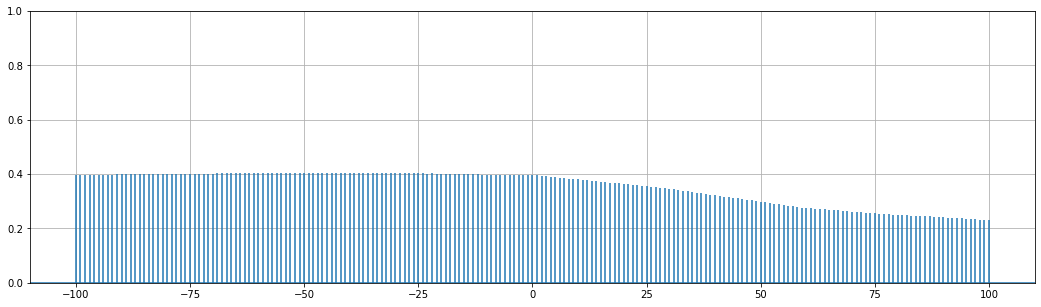

In [8]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

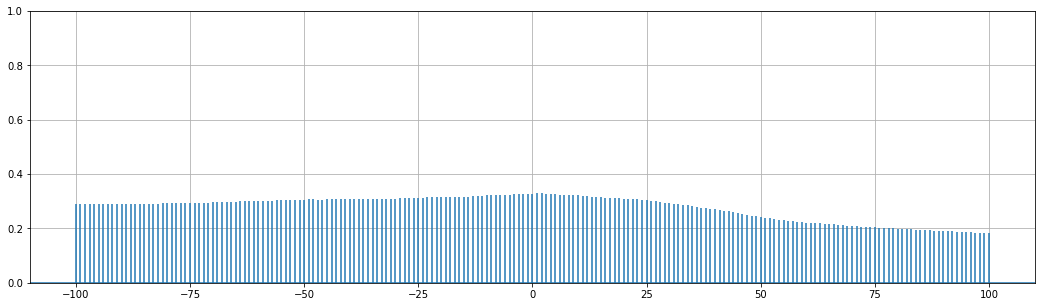

In [9]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

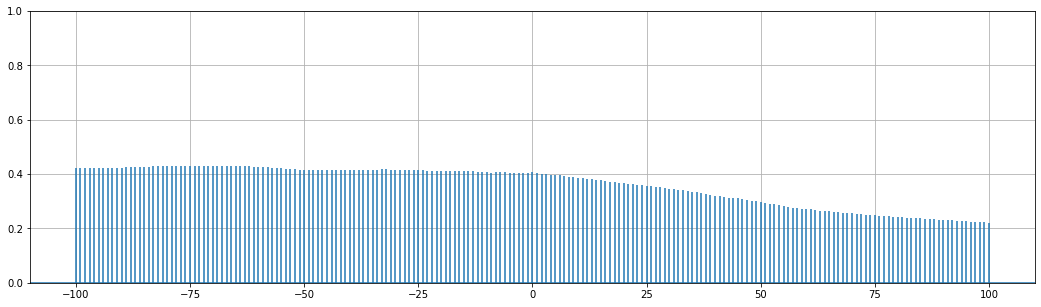

In [10]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [11]:
data.columns

Index(['daily_tweets', 'neg_sentiment', 'pos_sentiment', 'compound_sentiment',
       'closing_price'],
      dtype='object')

In [12]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.4538 , p=0.0000  , df_denom=2341, df_num=1
ssr based chi2 test:   chi2=19.4787 , p=0.0000  , df=1
likelihood ratio test: chi2=19.3982 , p=0.0000  , df=1
parameter F test:         F=19.4538 , p=0.0000  , df_denom=2341, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.2577  , p=0.0007  , df_denom=2338, df_num=2
ssr based chi2 test:   chi2=14.5465 , p=0.0007  , df=2
likelihood ratio test: chi2=14.5015 , p=0.0007  , df=2
parameter F test:         F=7.2577  , p=0.0007  , df_denom=2338, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.2236  , p=0.0055  , df_denom=2335, df_num=3
ssr based chi2 test:   chi2=12.7088 , p=0.0053  , df=3
likelihood ratio test: chi2=12.6744 , p=0.0054  , df=3
parameter F test:         F=4.2236  , p=0.0055  , df_denom=2335, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9727  , p=0.

{1: ({'ssr_ftest': (19.45378651163975, 1.0772687914983537e-05, 2341.0, 1),
   'ssr_chi2test': (19.478716609689695, 1.0172686442093304e-05, 1),
   'lrtest': (19.398227826044604, 1.0610547489027889e-05, 1),
   'params_ftest': (19.453786511639887, 1.0772687914983537e-05, 2341.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (7.257716966858513, 0.0007207054184516058, 2338.0, 2),
   'ssr_chi2test': (14.546476350170655, 0.0006938615069467839, 2),
   'lrtest': (14.501506605782197, 0.0007096396138713051, 2),
   'params_ftest': (7.257716966857717, 0.0007207054184520846, 2338.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.2235988886619715, 0.005485407450011604, 2335.0, 3),
   'ssr_chi2test': (12.708781923656964, 0.005310636963114638, 3),
   'lrtest': (12.674424278751758, 0.005396291340498372, 3),
   'params_ftest': (4.223598888661443, 0.005485407450016018, 2335.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

In [13]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0891  , p=0.2968  , df_denom=2341, df_num=1
ssr based chi2 test:   chi2=1.0905  , p=0.2964  , df=1
likelihood ratio test: chi2=1.0902  , p=0.2964  , df=1
parameter F test:         F=1.0891  , p=0.2968  , df_denom=2341, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4827  , p=0.6172  , df_denom=2338, df_num=2
ssr based chi2 test:   chi2=0.9674  , p=0.6165  , df=2
likelihood ratio test: chi2=0.9672  , p=0.6166  , df=2
parameter F test:         F=0.4827  , p=0.6172  , df_denom=2338, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4540  , p=0.7145  , df_denom=2335, df_num=3
ssr based chi2 test:   chi2=1.3661  , p=0.7135  , df=3
likelihood ratio test: chi2=1.3657  , p=0.7136  , df=3
parameter F test:         F=0.4540  , p=0.7145  , df_denom=2335, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3822  , p=0.

{1: ({'ssr_ftest': (1.0890768836927955, 0.29678358394549575, 2341.0, 1),
   'ssr_chi2test': (1.0904725396736064, 0.2963665330805625, 1),
   'lrtest': (1.0902189642292797, 0.2964226985732462, 1),
   'params_ftest': (1.0890768836929294, 0.29678358394549575, 2341.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4826590086289173, 0.6172017053528809, 2338.0, 2),
   'ssr_chi2test': (0.9673824270466665, 0.6165035404799069, 2),
   'lrtest': (0.9671827746242343, 0.6165650867644694, 2),
   'params_ftest': (0.48265900862870903, 0.6172017053530413, 2338.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.45401047034038533, 0.7144832859894663, 2335.0, 3),
   'ssr_chi2test': (1.3661145886987354, 0.7134965227828902, 3),
   'lrtest': (1.3657163086718356, 0.7135903234075027, 3),
   'params_ftest': (0.4540104703403817, 0.7144832859894663, 2335.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [14]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=207.3446, p=0.0000  , df_denom=2341, df_num=1
ssr based chi2 test:   chi2=207.6104, p=0.0000  , df=1
likelihood ratio test: chi2=198.9254, p=0.0000  , df=1
parameter F test:         F=207.3446, p=0.0000  , df_denom=2341, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=79.5876 , p=0.0000  , df_denom=2338, df_num=2
ssr based chi2 test:   chi2=159.5155, p=0.0000  , df=2
likelihood ratio test: chi2=154.3200, p=0.0000  , df=2
parameter F test:         F=79.5876 , p=0.0000  , df_denom=2338, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.4161 , p=0.0000  , df_denom=2335, df_num=3
ssr based chi2 test:   chi2=112.5849, p=0.0000  , df=3
likelihood ratio test: chi2=109.9625, p=0.0000  , df=3
parameter F test:         F=37.4161 , p=0.0000  , df_denom=2335, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=24.8510 , p=0.

{1: ({'ssr_ftest': (207.34464377469982, 4.1599002471715053e-45, 2341.0, 1),
   'ssr_chi2test': (207.61035668855033, 4.562807475954219e-47, 1),
   'lrtest': (198.92543651824235, 3.58367638289671e-45, 1),
   'params_ftest': (207.34464377470044, 4.159900247169732e-45, 2341.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (79.58755021079013, 3.6421035269106304e-34, 2338.0, 2),
   'ssr_chi2test': (159.51550910511656, 2.2995735719214194e-35, 2),
   'lrtest': (154.3199848606455, 3.0891647022667384e-34, 2),
   'params_ftest': (79.58755021078565, 3.6421035269257437e-34, 2338.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (37.416127293875725, 1.30048133937294e-23, 2335.0, 3),
   'ssr_chi2test': (112.58488666671128, 3.0478244947469525e-24, 3),
   'lrtest': (109.96250403054, 1.1179052006132197e-23, 3),
   'params_ftest': (37.41612729387479, 1.3004813393745294e-23, 2335.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.,